Iter 1/50 | α Fitness (Cost): 887.5000
Iter 2/50 | α Fitness (Cost): 887.5000
Iter 3/50 | α Fitness (Cost): 887.5000
Iter 4/50 | α Fitness (Cost): 887.5000
Iter 5/50 | α Fitness (Cost): 887.5000
Iter 6/50 | α Fitness (Cost): 1174.7817
Iter 7/50 | α Fitness (Cost): 1117.8763
Iter 8/50 | α Fitness (Cost): 887.5000
Iter 9/50 | α Fitness (Cost): 1249.1527
Iter 10/50 | α Fitness (Cost): 1175.9310
Iter 11/50 | α Fitness (Cost): 986.0407
Iter 12/50 | α Fitness (Cost): 887.5000
Iter 13/50 | α Fitness (Cost): 887.5000
Iter 14/50 | α Fitness (Cost): 952.2928
Iter 15/50 | α Fitness (Cost): 887.5000
Iter 16/50 | α Fitness (Cost): 887.5000
Iter 17/50 | α Fitness (Cost): 887.5000
Iter 18/50 | α Fitness (Cost): 887.5000
Iter 19/50 | α Fitness (Cost): 887.5000
Iter 20/50 | α Fitness (Cost): 887.5000
Iter 21/50 | α Fitness (Cost): 887.5000
Iter 22/50 | α Fitness (Cost): 887.5000
Iter 23/50 | α Fitness (Cost): 887.5000
Iter 24/50 | α Fitness (Cost): 1015.2501
Iter 25/50 | α Fitness (Cost): 900.2555
Iter

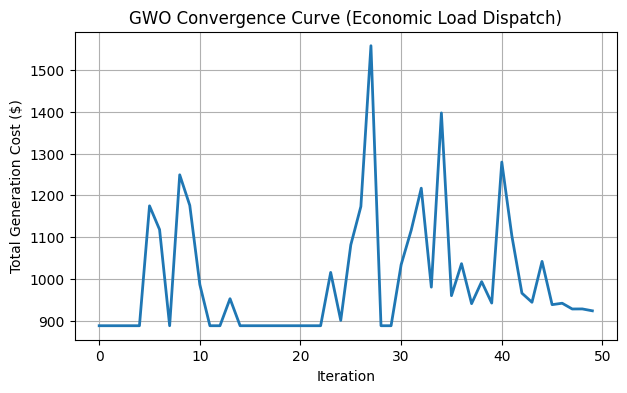

In [9]:
import numpy as np
import random

# ------------------------------
# Grey Wolf Optimizer (GWO)
# ------------------------------

def grey_wolf_optimizer(fitness_func, bounds, dim, N=20, T_max=50):
    wolves = np.random.uniform(bounds[:, 0], bounds[:, 1], (N, dim))
    fitness = np.array([fitness_func(w) for w in wolves])

    idx = np.argsort(fitness)
    alpha, beta, delta = wolves[idx[0]], wolves[idx[1]], wolves[idx[2]]
    f_alpha, f_beta, f_delta = fitness[idx[0]], fitness[idx[1]], fitness[idx[2]]

    convergence_curve = []

    for t in range(T_max):
        a = 2 - (2 * t / T_max)
        for i in range(N):
            X_new = np.zeros(dim)
            for d in range(dim):
                Xs = []
                for leader in [alpha, beta, delta]:
                    r1, r2 = random.random(), random.random()
                    A = 2 * a * r1 - a
                    C = 2 * r2
                    D = abs(C * leader[d] - wolves[i][d])
                    Xs.append(leader[d] - A * D)
                X_new[d] = np.mean(Xs)

            # Apply bounds
            X_new = np.clip(X_new, bounds[:, 0], bounds[:, 1])
            wolves[i] = X_new
            fitness[i] = fitness_func(X_new)

        idx = np.argsort(fitness)
        alpha, beta, delta = wolves[idx[0]], wolves[idx[1]], wolves[idx[2]]
        f_alpha, f_beta, f_delta = fitness[idx[0]], fitness[idx[1]], fitness[idx[2]]

        convergence_curve.append(f_alpha)
        print(f"Iter {t+1}/{T_max} | α Fitness (Cost): {f_alpha:.4f}")

    return alpha, f_alpha, convergence_curve


# ------------------------------
# Application: Economic Load Dispatch (ELD)
# ------------------------------

def economic_load_dispatch():
    # Generator data: [a, b, c, Pmin, Pmax]
    gens = np.array([
        [0.00375, 2.00, 0, 50, 200],
        [0.0175,  1.75, 0, 50, 150],
        [0.0625,  1.00, 0, 50, 100]
    ])

    Pd = 300  # Power demand (MW)
    num_gens = gens.shape[0]

    # Fitness Function: minimize total cost + penalty for power imbalance
    def fitness_func(P):
        # Apply bounds
        P = np.clip(P, gens[:, 3], gens[:, 4])
        penalty = abs(np.sum(P) - Pd) * 100  # penalty for not meeting demand
        cost = np.sum(gens[:, 0] * P**2 + gens[:, 1] * P + gens[:, 2])
        return cost + penalty

    bounds = gens[:, [3, 4]]  # (Pmin, Pmax)
    dim = num_gens

    # Run GWO
    alpha, best_cost, curve = grey_wolf_optimizer(fitness_func, bounds, dim, N=30, T_max=50)

    # Print results
    print("\n--- Optimal Dispatch ---")
    for i, p in enumerate(alpha):
        print(f"Generator {i+1}: {p:.3f} MW")
    print(f"Total Power: {np.sum(alpha):.3f} MW")
    print(f"Total Cost: ${best_cost:.3f}")

    # Plot convergence
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7,4))
    plt.plot(curve, linewidth=2)
    plt.title("GWO Convergence Curve (Economic Load Dispatch)")
    plt.xlabel("Iteration")
    plt.ylabel("Total Generation Cost ($)")
    plt.grid(True)
    plt.show()


# ------------------------------
# Run Example
# ------------------------------

if __name__ == "__main__":
    economic_load_dispatch()
